In [1]:
import fasttext
from tqdm import tqdm
import pandas as pd

In [2]:
model = fasttext.load_model("/home/burak/Desktop/cc.en.300.bin")

In [3]:
df = pd.read_csv("processed.csv",encoding="utf-8",lineterminator="\n")

In [4]:
sent_vectors = []
for item in tqdm(df.iterrows()):
    sent_vectors.append(model.get_sentence_vector(item[1].content))

81170it [00:12, 6712.89it/s]


In [5]:
labels_encoded = []
for item in tqdm(df.iterrows()):
    if item[1].label == "CYBER":
        labels_encoded.append(1)
    else:
        labels_encoded.append(0)

81170it [00:07, 11311.06it/s]


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(sent_vectors,labels_encoded,test_size=0.15)

In [11]:
import numpy as np

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [15]:
rfc.fit(X_trainain,Y_train)

RandomForestClassifier()

In [16]:
rfc.score(X_test,Y_test)

0.9508869908015769

In [18]:
rfc.predict([model.get_sentence_vector("i've found a critical buffer overflow in microsoft office 2007")])

array([1])

In [19]:
rfc.predict([model.get_sentence_vector("i've found a new gameboy in my pocket")])

array([0])

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_trainain, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [21]:
clf.score(X_test,Y_test)

0.9717477003942181

In [22]:
clf.predict([model.get_sentence_vector("i've found a critical buffer overflow in microsoft office 2007")])

array([1])

In [23]:
clf.predict([model.get_sentence_vector("i've found a new gameboy in my pocket")])

array([0])

In [24]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_trainain)

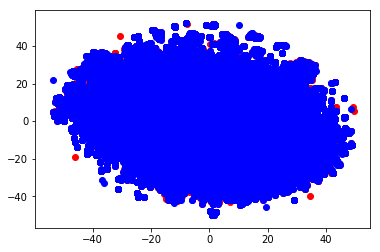

In [30]:
from matplotlib import pyplot as plt
plt.scatter(X_embedded[:30000,0],X_embedded[:30000,1],c="red")
plt.scatter(X_embedded[30000:,0],X_embedded[30000:,1],c="blue")

In [27]:
X_embedded_embedded.shape

(68994, 2)